# Vector - Exercise (July 13th, 2024)

In [ ]:
import numpy as np

In [ ]:
SEED = 12345
rng = np.random.default_rng(SEED)

## 1. Vector and Matrix operations

### 1.1 Length of a vector

In [ ]:
def compute_vector_length(vector: np.ndarray):
    # *********** Your code here ***********
    len_of_vector = np.sqrt(np.sum(vector**2))
    # *********** End code here ************
    return len_of_vector

In [ ]:
vector = np.array([-2, 4, 9, 21])
result = compute_vector_length(vector)
print(round(result, 2))

23.28


### 1.2 Dot product

In [ ]:
def compute_dot_product(vector1, vector2):
    # *********** Your code here ***********
    result = np.dot(vector1, vector2)
    # *********** End code here ************
    return result

In [ ]:
v1 = np.array([0, 1, -1, 2])
v2 = np.array([2, 5, 1, 0])
result = compute_dot_product(v1, v2)
print(round(result, 2))

4


### 1.3 Multiply matrix by a vector

In [ ]:
def matrix_multi_vector(matrix, vector):
    # *********** Your code here ***********
    result = np.dot(matrix, vector)
    # *********** End code here ************
    return result

In [ ]:
x = np.array([[1, 2], [3, 4]])
k = np.array([1, 2])
print('result\n', x.dot(k))

result
 [ 5 11]


In [ ]:
x = np.array([[-1, 2], [3, -4]])
k = np.array([1, 2])
print('result\n', x @ k)

result
 [ 3 -5]


In [ ]:
m = np.array([[-1, 1, 1], [0, -4, 9]])
v = np.array([0, 2, 1])
result = matrix_multi_vector(m, v)
print(result)

[3 1]


### 1.4 Multiply a matrix by a matrix

In [ ]:
def matrix_multi_matrix(matrix1, matrix2):
    # *********** Your code here ***********
    result = np.dot(matrix1, matrix2)
    # *********** End code here ************
    return result

In [ ]:
x = rng.integers(3, size=(4, 2))
matrix_multi_matrix(x, x.T)

array([[4, 4, 0, 2],
       [4, 4, 0, 2],
       [0, 0, 4, 4],
       [2, 2, 4, 5]], dtype=int64)

In [ ]:
m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3], [6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(result)

[[  6  -1]
 [-16 -10]]


In [ ]:
m1 = np.eye(3)
m2 = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
result = m1@m2
print(result)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [ ]:
m1 = np.eye(2)
m1 = np.reshape(m1, (-1, 4))[0]
m2 = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1@m2
print(result)

[5. 5. 5. 5.]


In [ ]:
m1 = np.array([[1, 2], [3, 4]])
m1 = np.reshape(m1, (-1, 4), "F")[0]
m2 = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1@m2
print(result)

[29 29 29 29]


### 1.5 Inverse of a matrix

In [ ]:
def inverse_matrix(matrix):
    # *********** Your code here ***********
    result = np.linalg.inv(matrix)
    # *********** End code here ************
    return result

In [ ]:
x = 4*np.eye(3)
inverse_matrix(x)

array([[0.25, 0.  , 0.  ],
       [0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.25]])

In [ ]:
m1 = np.array([[-2, 6], [8, -4]])
result = inverse_matrix(m1)
print(result)

[[0.1  0.15]
 [0.2  0.05]]


## 2. Eigenvector and Eigenvalue 

In [ ]:
def compute_eigenvalues_eigenvectors(matrix):
    # *********** Your code here ***********
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    # *********** End code here ************
    return eigenvalues, eigenvectors

In [ ]:
A = rng.integers(20, size=(3, 3))
lambda_, v = compute_eigenvalues_eigenvectors(A)
np.isclose(A@v - lambda_*v, 0)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print(eigenvectors)

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


## 3. Cosine similarity

In [ ]:
def compute_cosine(v1, v2):
    # *********** Your code here ***********
    result = np.dot(v1, v2) / (compute_vector_length(v1)
                               * compute_vector_length(v2))
    # *********** End code here ************
    return result

In [ ]:
x = np.array([1, 0])
y = np.array([1, 1])
np.isclose(compute_cosine(x, y), np.cos(np.pi/4))

True

In [ ]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x, y)
print(round(result, 3))

0.577


## 4. Background substraction

### 4.1 Resize input images

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
bg1_image = cv2.imread('GreenBackground.png', 1)
ob_image = cv2.imread('Object.png', 1)
bg2_image = cv2.imread('NewBackground.jpg', 1)
print(bg1_image.shape, ob_image.shape, bg2_image.shape)

(381, 678, 3) (381, 678, 3) (408, 612, 3)


In [ ]:
def display_image(image_bgr, title='Image'):
    if len(image_bgr.shape) == 3:
        plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
        plt.title(title)
    else:
        plt.imshow(image_bgr, cmap='gray')
        plt.title(title)
    # cv2.imshow(title, image_bgr)
    # cv2.imshow(title, image_bgr)
    # cv2.waitKey(1)
    # cv2.destroyAllWindows()

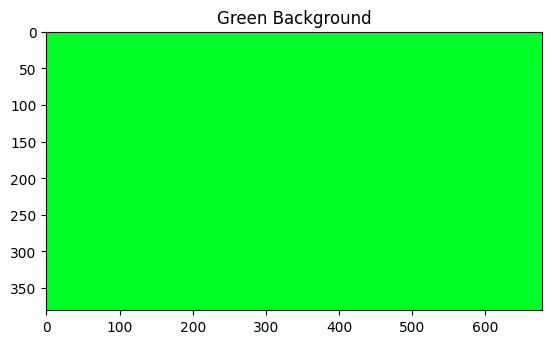

In [ ]:
display_image(bg1_image, 'Green Background')

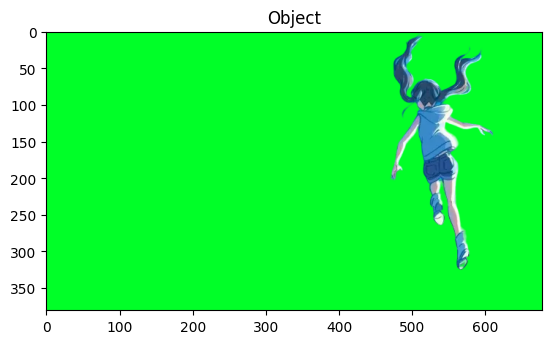

In [ ]:
display_image(ob_image, 'Object')

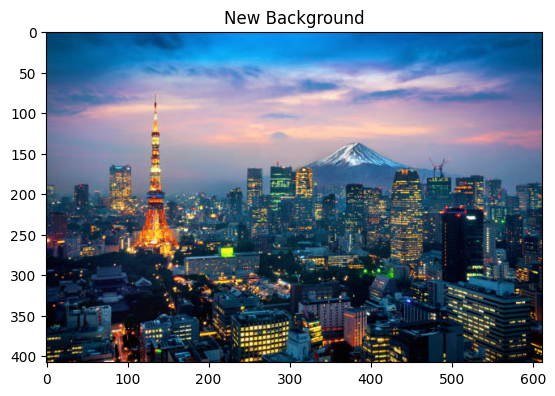

In [ ]:
display_image(bg2_image, 'New Background')

In [ ]:
bg1_image = cv2.resize(bg1_image, ob_image.shape[1::-1])
bg2_image = cv2.resize(bg2_image, ob_image.shape[1::-1])

### 4.2 Compute the difference

In [ ]:
ob_image[ob_image == [40, 255, 0]]

array([ 40, 255,   0, ...,  40, 255,   0], dtype=uint8)

In [ ]:
def compute_difference(bg_img, input_img) -> np.ndarray:
    # *********** Your code here ***********
    # difference_single_channel = cv2.absdiff(
    #     bg_img, input_img)  # Be aware of overflow
    difference_single_channel = np.where(
        bg_img > input_img, bg_img-input_img, input_img-bg_img)
    difference_single_channel = (
        difference_single_channel.sum(axis=-1) / 3).astype(np.uint8)
    # *********** End code here ************
    return difference_single_channel

(381, 678)


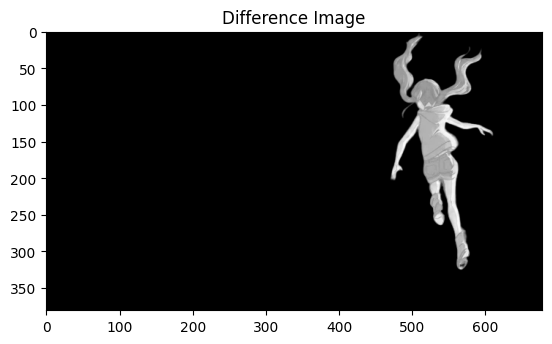

In [ ]:
difference_single_channel = compute_difference(ob_image, bg1_image)
display_image(difference_single_channel, 'Difference Image')
print(difference_single_channel.shape)

### 4.3 Compute mask

In [ ]:
def compute_binary_mask(difference_single_channel, threshold=15):
    # *********** Your code here ***********
    # _, difference_binary = cv2.threshold(
    #     difference_single_channel, 1, 255, cv2.THRESH_BINARY)
    difference_binary = np.where(
        difference_single_channel > threshold, 255, 0)
    difference_binary = np.stack(
        [difference_binary]*3, axis=-1).astype(np.uint8)
    # *********** End code here ************
    return difference_binary

(381, 678, 3) (381, 678, 3)


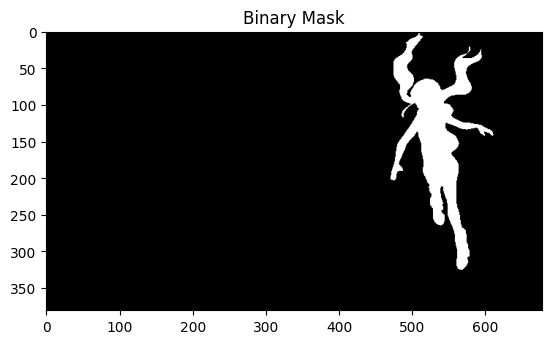

In [ ]:
binary_mask = compute_binary_mask(difference_single_channel)
print(binary_mask.shape, ob_image.shape)
display_image(binary_mask, 'Binary Mask')

### 4.4 Apply mask to the input image

In [ ]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    # This threshold is specifically set to 80 for the specific image with the vibrant, saturated baackground
    # You can change it to better generalize the input
    binary_mask = compute_binary_mask(difference_single_channel, 80)
    display_image(binary_mask, 'Binary Mask')
    output = np. where(binary_mask == 255, ob_image, bg2_image)

    return output

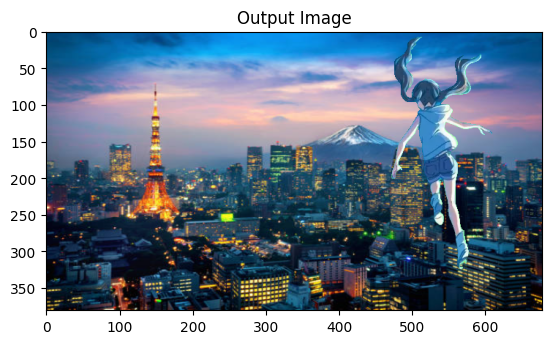

In [ ]:
output_img = replace_background(bg1_image, bg2_image, ob_image)
display_image(output_img, 'Output Image')